In [12]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [13]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [14]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')

In [15]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [16]:
x = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [17]:
x.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [18]:
Y = data["Class"].to_numpy()

## TASK  2
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [19]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(x)

## TASK  3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test :", Y_test.shape)

X_train: (72, 83)
X_test : (18, 83)
Y_train: (72,)
Y_test : (18,)


## TASK  4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": [0.01, 0.1, 1],
    "solver": ["lbfgs"]
}

lr = LogisticRegression(max_iter=1000)

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy (cv best score):", logreg_cv.best_score_)

tuned hyperparameters (best parameters): {'C': 0.01, 'solver': 'lbfgs'}
accuracy (cv best score): 0.8464285714285713


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:

test accuracy: 0.8333333333333334


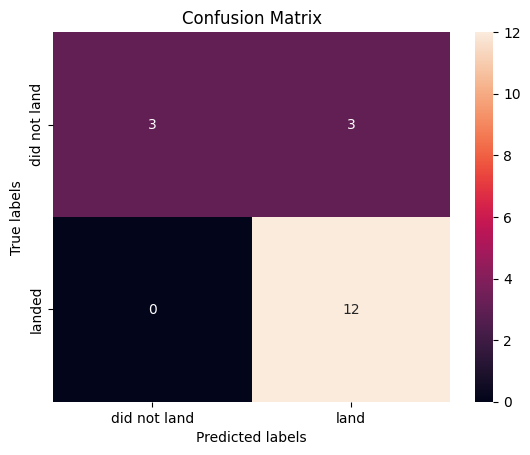

In [24]:
print("test accuracy:", logreg_cv.score(X_test, Y_test))

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

parameters = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": np.logspace(-3, 3, 5),
    "gamma": np.logspace(-3, 3, 5),
}

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("accuracy (cv best score):", svm_cv.best_score_)


tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy (cv best score): 0.8482142857142856


## TASK  7 
Calculate the accuracy on the test data using the method <code>score</code>:

test accuracy: 0.8333333333333334


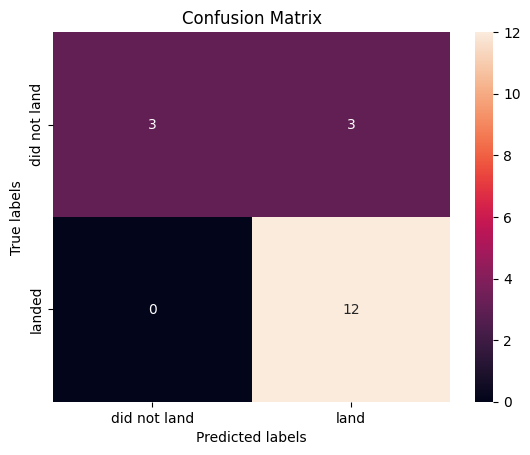

In [26]:
print("test accuracy:", svm_cv.score(X_test, Y_test))

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


## TASK  8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [28]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [2 * n for n in range(1, 10)],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
}

tree = DecisionTreeClassifier(random_state=2)

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("accuracy (cv best score):", tree_cv.best_score_)

tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy (cv best score): 0.8767857142857143


## TASK  9 
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

test accuracy: 0.8333333333333334


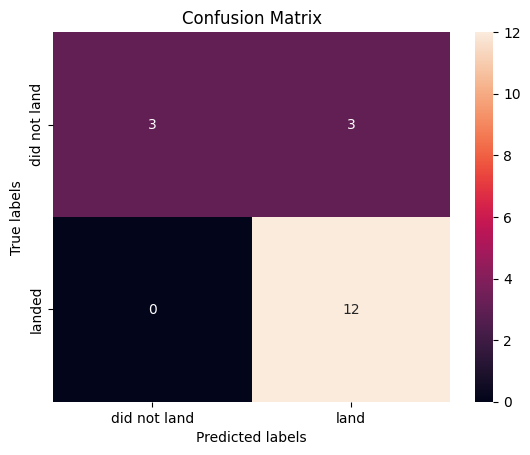

In [29]:
print("test accuracy:", tree_cv.score(X_test, Y_test))

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  10 
Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],  # 1=Manhattan, 2=Euclidean
}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10, n_jobs=1)
knn_cv.fit(X_train, Y_train)

print("tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("accuracy (cv best score):", knn_cv.best_score_)

tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy (cv best score): 0.8482142857142858


## TASK  11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


test accuracy: 0.8333333333333334


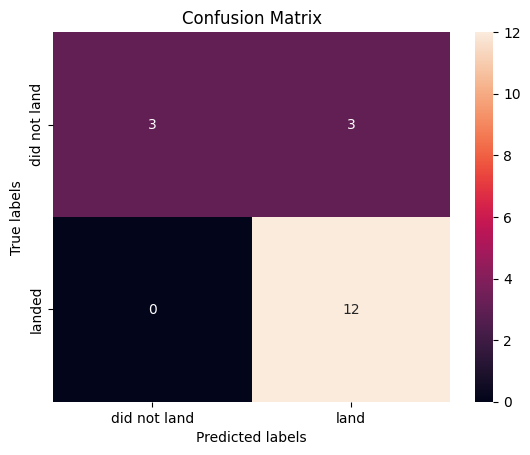

In [31]:
print("test accuracy:", knn_cv.score(X_test, Y_test))

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK  12
Find the method performs best:

All four models achieved identical test accuracy and confusion matrices.
The Decision Tree classifier achieved the highest cross-validation accuracy and was selected as the best-performing model due to better generalization during training.